In [1]:
from glob2 import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cv2
import matplotlib.lines as lines

In [2]:
x_files = glob('images\\*.png')
info = [[file, file.split('_')[0][-4:], file.split('_')[1], float(file.split('_')[2]), float(file.split('_')[3]), int(file.split('_')[4][:6])] for file in x_files]
data = pd.DataFrame(info, columns=['file_name', 'id', 'sex', 'weight', 'height', 'number'])
data['sex_number'] = np.where(data['sex']=='Men', 0, 1)
data.head()

,file_name,id,sex,weight,height,number,sex_number
0,images\0001_Women_24.5_1.30_000040.png,0001,Women,24.5,1.30,40,1
1,images\0001_Women_24.5_1.34_000007.png,0001,Women,24.5,1.34,7,1
2,images\0001_Women_24.5_1.39_000022.png,0001,Women,24.5,1.39,22,1
3,images\0001_Women_24.5_1.40_000021.png,0001,Women,24.5,1.40,21,1
4,images\0001_Women_24.5_1.40_000026.png,0001,Women,24.5,1.40,26,1


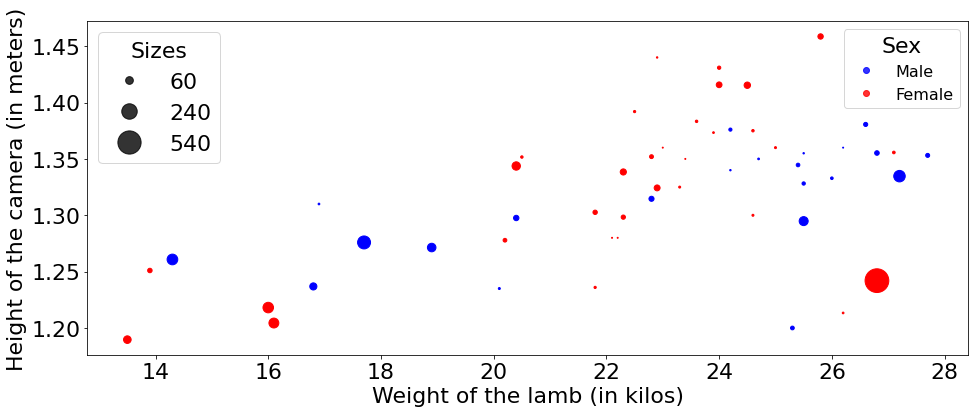

In [3]:
data_mean = data.groupby(['id']).mean()
data_mean['sex_color'] = np.where(data_mean['sex_number']==0, 'orange', 'green')
data_mean['sex_label'] = np.where(data_mean['sex_number']==0, 'Men', 'Women')
data_count = data.groupby(['id']).count()

plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(figsize=(14,6))
scatter = plt.scatter(
    data_mean.weight.values, 
    data_mean.height.values, 
    c= data_mean.sex_number.values, 
    s=data_count.number.values, 
    label= data_mean.sex_color.values,
    marker='o', cmap='bwr') #Spectral

handles, labels = scatter.legend_elements(prop="colors", alpha=0.8)
legend1 = ax.legend(handles, ['Male', 'Female'], loc="upper right", title="Sex",fontsize=16)
ax.add_artist(legend1)

handles, labels = scatter.legend_elements(prop="sizes", alpha=0.8)
handles = [handles[0]] + [handles[3]] + [handles[8]]
labels = [labels[0]] + [labels[3]] + [labels[8]]

legend2 = ax.legend(handles, labels, loc="upper left", title="Sizes")

ax.set_ylabel('Height of the camera (in meters)')
ax.set_xlabel('Weight of the lamb (in kilos)')

plt.tight_layout()
plt.savefig('results/img_dataset_info.png', dpi=600)
plt.show()

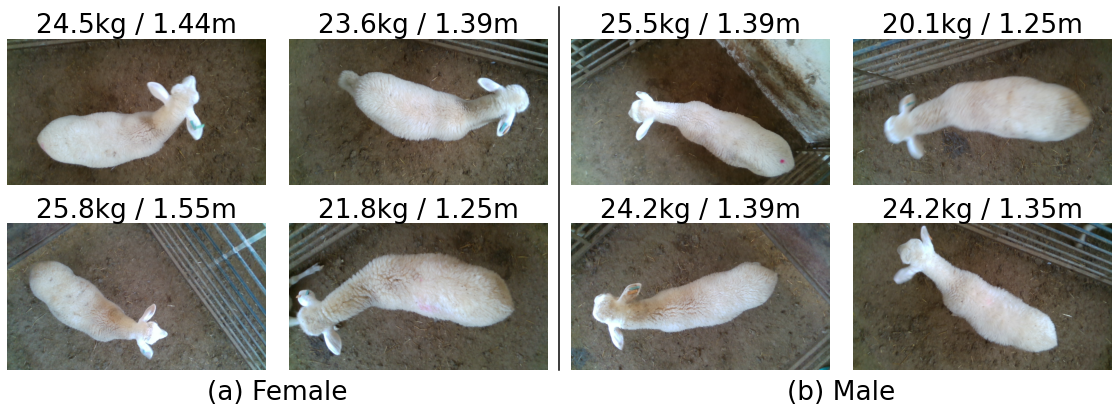

In [4]:
fig, ax = plt.subplots(3,4,figsize=(16,6), gridspec_kw={'height_ratios': [3, 3, 0.1]})

female_data = data[(data['sex']=='Women')]
female_data = female_data.drop_duplicates(subset=['id'], keep='last')
female_index = female_data.index

male_data = data[(data['sex']=='Men')]
male_data = male_data.drop_duplicates(subset=['id'], keep='last')
male_index = male_data.index

for i in range(4):
    info = female_data.loc[female_index[i*2]]
    img = cv2.imread(info.file_name)
    ax[i%2][int(i/2)].imshow(img)
    ax[i%2][int(i/2)].axis('off')
    ax[i%2][int(i/2)].title.set_text(str(info.weight)+'kg / '+ str(info.height)+'m')
    
    info = male_data.loc[male_index[i*2]]
    img = cv2.imread(info.file_name)
    ax[(i%2)][int(i/2)+2].imshow(img)
    ax[(i%2)][int(i/2)+2].axis('off')
    ax[(i%2)][int(i/2)+2].title.set_text(str(info.weight)+'kg / '+ str(info.height)+'m')

    ax[2][i].remove()
    
    
gs = ax[2, 0].get_gridspec()
ax3 = fig.add_subplot(gs[2, 0:2])
ax3.title.set_text('(a) Female')
ax3.axis('off')

ax4 = fig.add_subplot(gs[2, 2:4])
ax4.title.set_text('(b) Male')
ax4.axis('off')

fig.add_artist(lines.Line2D([0.5, 0.5], [0.15, 0.99], color='black'))

plt.tight_layout()
plt.savefig('results/img_dataset_images.png', dpi=600)
plt.show()

In [5]:
data.describe()

,weight,height,number,sex_number
count,2030.000000,2030.000000,2030.000000,2030.000000
mean,22.211576,1.279833,107.397044,0.606897
std,4.762831,0.066230,141.606459,0.488560
min,13.500000,1.160000,1.000000,0.000000
25%,17.700000,1.232500,15.000000,0.000000
50%,24.000000,1.250000,47.000000,1.000000
75%,26.800000,1.330000,120.000000,1.000000
max,27.700000,1.550000,563.000000,1.000000


In [6]:
data_mean.tail()

,weight,height,number,sex_number,sex_color,sex_label
id,,,,,,
0050,23.9,1.373333,2.0,1,green,Women
0051,26.2,1.213333,2.0,1,green,Women
0052,24.6,1.300000,2.5,1,green,Women
0053,16.9,1.310000,2.0,0,orange,Men
0054,24.7,1.350000,2.0,0,orange,Men
